<a href="https://colab.research.google.com/github/tyceaddley/Heart_Failure_Analysis/blob/master/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline
!pip install bubbly

  Created wheel for bubbly: filename=bubbly-1.0.2-cp36-none-any.whl size=5429 sha256=d3708d5e86b84d88df9f2d913ec1020934567253422134a3d205df5ef117046f
  Stored in directory: /root/.cache/pip/wheels/cf/3c/75/8c09dbf7cd6b320b69a6bc679fd111abd1139866c722b1476b
Successfully built bubbly


In [4]:
import numpy as np
import pandas as pd
import pandas_profiling

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for advanced visualizations 
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.offline as py

from plotly.offline import iplot
import plotly.graph_objs as go

from bubbly.bubbly import bubbleplot


In [7]:
df = pd.read_csv('../content/drive/My Drive/Colab Notebooks/heart_failure_clinical_records_dataset.csv')

In [8]:
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [9]:
df.shape
df = df.sort_values('age')

In [10]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [11]:
import warnings
warnings.filterwarnings('ignore')

#generate a fun graph with four of the variables plotted to understand their relationships a little better.
#may or may not provide insight
figure = bubbleplot(dataset= df, x_column = 'creatinine_phosphokinase', y_column = 'platelets',
                    bubble_column = 'sex', time_column = 'age', size_column = 'serum_sodium',
                    color_column = 'sex', x_title = "Creatinine Phosphokinase", y_title = "Platelets",
                    title = "Creatinine Phosphokinase vs Platelet Count vs Age vs Sex",
                    x_logscale = False, scale_bubble = 1, height = 650)

#set iplot so that it shows in colab. settings in 2nd cell
py.iplot(figure, config={'scrollZoom': True})

Text(0.5, 1.0, 'Heatmap for the dataset')

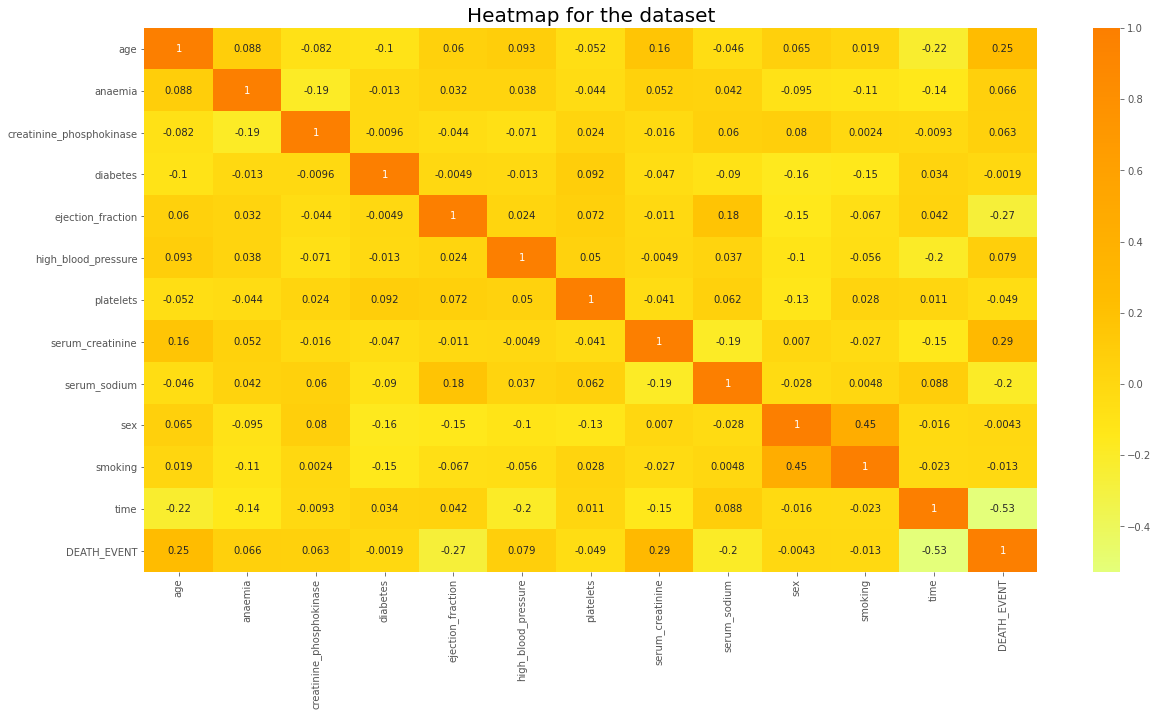

In [12]:
#use ggplot styling and set size of figure
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('ggplot')

#show the heatmap and set the style of the figure
sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the dataset', fontsize = 20)



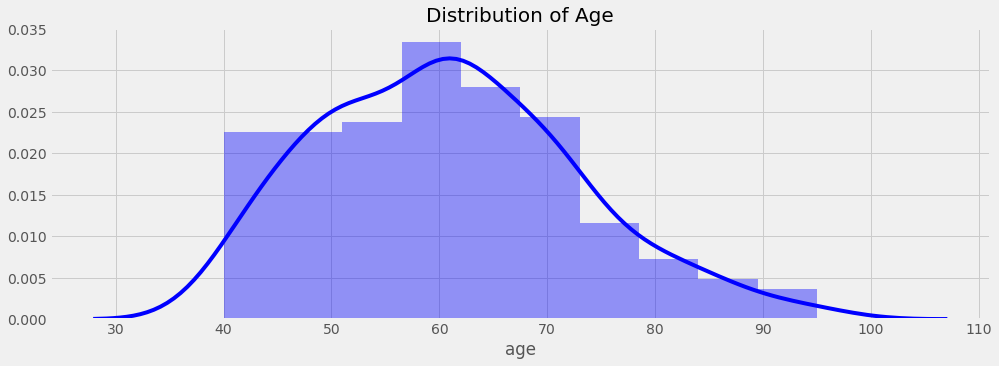

In [13]:
#show graph of age distribution and the upper/lower tails
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)
sns.distplot(df['age'], color = 'blue')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

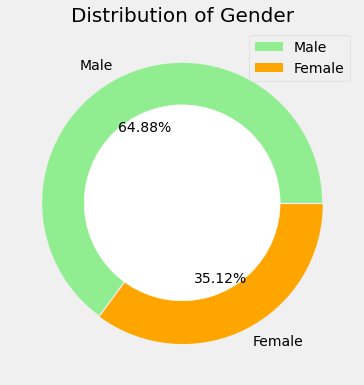

In [14]:
#set easy params for chart
gen_size = df['sex'].value_counts()
colors = ['lightgreen', 'orange']
labels = "Male", "Female"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

#visualize the distribution of Male vs Female patients
plt.rcParams['figure.figsize'] = (6,6)
plt.pie(gen_size, colors = colors, labels = labels, shadow = False, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

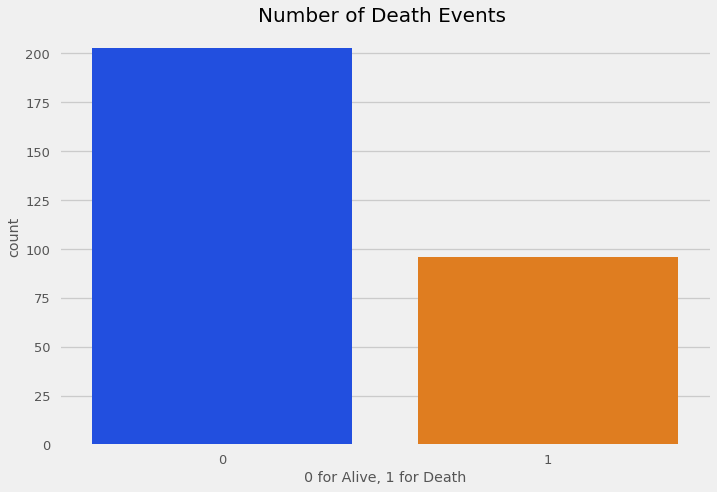

In [15]:
#how many people died or lived 
plt.rcParams['figure.figsize'] = [10, 6]
plt.style.use('seaborn-talk')
sns.countplot(df['DEATH_EVENT'], palette = 'bright')
plt.xlabel('0 for Alive, 1 for Death')
plt.title('Number of Death Events ', fontsize = 20)
plt.show()

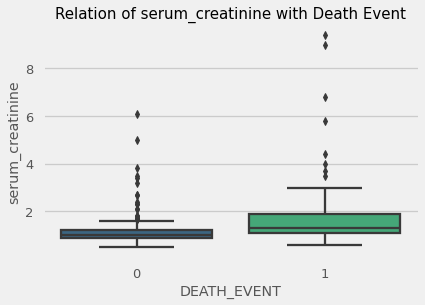

In [16]:
#serum_creatinine and the correspondence with death event
plt.rcParams['figure.figsize'] = (6,4)
sns.boxplot(df['DEATH_EVENT'], df['serum_creatinine'], palette = 'viridis')
plt.title('Relation of serum_creatinine with Death Event', fontsize = 15)
plt.show()

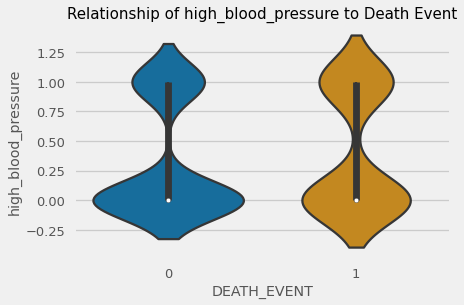

In [17]:
plt.rcParams['figure.figsize'] = (6,4)
sns.violinplot(df['DEATH_EVENT'], df['high_blood_pressure'], palette = 'colorblind')
plt.title('Relationship of high_blood_pressure to Death Event', fontsize = 15, fontweight = 25)
plt.show()

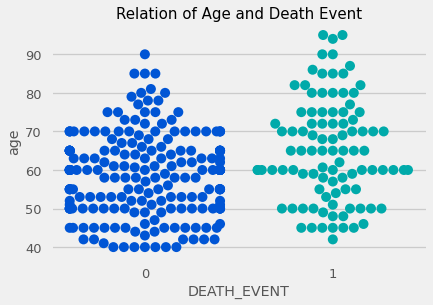

In [18]:
plt.rcParams['figure.figsize'] = (6,4)
sns.swarmplot(df['DEATH_EVENT'], df['age'], palette = 'winter', size = 10)
plt.title('Relation of Age and Death Event', fontsize = 15, fontweight = 15)
plt.show()

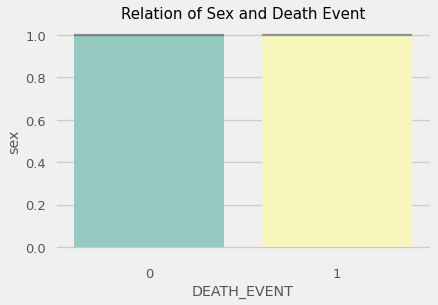

In [19]:
sns.boxenplot(df['DEATH_EVENT'], df['sex'], palette = 'Set3')
plt.title('Relation of Sex and Death Event', fontsize = 15,  fontweight = 20)
plt.show()